## Imports and Getting Dataset

In [0]:
!wget https://raw.githubusercontent.com/tasdikrahman/datasets/master/email/csv/spam-apache.csv

--2019-10-11 04:54:04--  https://raw.githubusercontent.com/tasdikrahman/datasets/master/email/csv/spam-apache.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366506 (358K) [text/plain]
Saving to: ‘spam-apache.csv.69’

spam-apache.csv.69  100%[===================>] 357.92K  --.-KB/s    in 0.05s   

2019-10-11 04:54:05 (7.09 MB/s) - ‘spam-apache.csv.69’ saved [366506/366506]



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

df = pd.read_csv('spam-apache.csv', header=0)

## Preprocessing



In [0]:
# Dictionaries
ham = {}
spam = {}
tokens = {}

# Get rows, shuffle, split into training and test sets
rows = df.iloc[:, 0:2].values
np.random.shuffle(rows)
rows = pd.DataFrame.from_records(rows)
# 80-20 spilt
size = int(len(rows) * .8)
training_set = rows[:size]
test_set = rows[size:]

# clean emails using regular expressions and stopwords
def clean_email(email):
  clean_email = []
  stopwords = ['a', "the", "is", "we", "are", "that", 'i', "on", "an", "this"
               "so", "do", "to", "and", "for", "of", "will", "or", "then", 
               "from", "no", "you", "no", "so", "if", "be", "with", "has",
               "they"]    
  words = re.sub("[^\w]", " ",  email).split()
  for word in words:
    if word not in stopwords:
      clean_email.append(word.lower())
  return clean_email

## Training

In [0]:
# Get emails
e = [training_set.iloc[:, 0], training_set.iloc[:, 1]]

# add words into dictionaries
for i in range(len(training_set)):
  email = e[1].iloc[i]
  words = clean_email(email)
  for word in words:
    if(word not in tokens):
      tokens[word] = 1
    else:
      tokens[word] += 1

# limit words
vocab = tokens.copy()
for word in tokens:
  if (tokens[word] <= 50):
    vocab.pop(word, None)

ham  = vocab.copy()
spam = vocab.copy()

# Add words to correct dictionary 
for i in range (len(training_set)):
    email = e[1].iloc[i]
    # clean words
    words = clean_email(email)
    if e[0].iloc[i] == 1:    # ham
      for word in words:
        if(word in ham):
          ham[word]+=1
        else:
          ham[word]=1
    else:                    # spam
      for word in words:
        if(word in spam):
          spam[word]+=1
        else:
          spam[word]=1
          
# length of dicionaries
hlen = len(ham)
slen = len(spam)

# dicionaries for probabilities
ham_probs = {}
spam_probs = {}


for word in vocab:
  ham_probs[word] = ham[word]/(ham[word] + spam[word])
  spam_probs[word] = spam[word]/(ham[word] + spam[word])

ham_prob = hlen / (hlen + slen)
spam_prob = slen / (hlen + slen)
print(vocab)
print(len(vocab))

{'the': 244, '2002': 76, 'out': 153, 'up': 104, 'his': 74, 'by': 149, 'he': 80, '000': 142, 'could': 55, 'way': 53, 'than': 62, 'in': 708, '30': 239, 'i': 629, 'it': 458, 'all': 181, 'my': 221, 'who': 69, 'me': 100, 'money': 85, 'want': 62, 'first': 51, 'this': 457, 'on': 59, 's': 313, 'don': 65, 't': 154, 'not': 221, 'but': 162, 'here': 75, 'just': 125, 'any': 85, 'like': 83, 'other': 90, 'how': 70, 'about': 73, 'what': 77, 'your': 373, 'http': 305, 'com': 263, 'name': 78, 'address': 70, 'our': 148, 'their': 66, 'was': 117, 'as': 240, 'one': 116, 'when': 59, 'now': 73, 'am': 63, 'us': 77, 'if': 96, 'can': 172, 'please': 89, 'get': 96, 'there': 107, '00': 56, 'have': 296, 'which': 82, '0': 88, 'would': 71, 'at': 171, 'lists': 82, 'you': 151, '10': 54, 'use': 74, 'some': 70, 'free': 147, 'more': 105, 'www': 198, 'linux': 75, 'also': 66, 'them': 54, 'a': 76, 'had': 54, 'make': 82, 'only': 95, 'time': 102, '2': 198, '5': 159, 'email': 96, 'br': 267, 'for': 53, '1': 232, 'p': 69, 'no': 87,

## Testing

In [0]:
# get emails for test set
test_rows = [test_set.iloc[:, 0], test_set.iloc[:, 1]]

def test(words):
  hprob = 1
  sprob = 1
  result = 0
  for word in words: 
    if word in vocab:
      #print(ham_probs[word])
      if ham_probs[word] != 0.0:
        hprob *= ham_probs[word]
      if spam_probs[word] != 0.0:
        sprob *= spam_probs[word]
  
  hprob *= ham_prob
  sprob *= spam_prob
  if hprob > sprob:
    result = 1
  else:
    result = -1
  print(hprob, sprob)
  return result
   
res = np.zeros(len(test_set), dtype=int)
acc = 0.0
count = 0
for i in range(len(test_set)):
  email = test_rows[1].iloc[i]
  words = clean_email(email)
  res[i] = test(words)
  print(test_rows[0].iloc[i], "\t", res[i])
  if test_rows[0].iloc[i] == res[i]:
    count += 1
acc = (count/len(res) * 100)
acc

6.116325505568795e-14 6.800813140224173e-11
-1 	 -1
6.776199812916668e-33 2.9859871108208414e-32
1 	 -1
7.964068150444397e-28 5.76333660040049e-22
-1 	 -1
1.3918857396438217e-33 4.581756633394871e-31
1 	 -1
5.4367542322478155e-30 3.456162008321909e-20
-1 	 -1
5.179319638337741e-30 8.360588965206914e-22
-1 	 -1
3.0451560780063395e-11 1.5648015232057392e-07
-1 	 -1
1.1798574942753011e-38 5.160967454145036e-27
-1 	 -1
5.179319638337741e-30 8.360588965206914e-22
-1 	 -1
1.8344023142966916e-09 1.4705481319468848e-09
1 	 1
4.4222560193797604e-21 4.0718974320536035e-21
1 	 1
2.468400474628064e-22 6.864909781229891e-19
-1 	 -1
1.4622970298927986e-13 3.2957973848993165e-12
1 	 -1
5.819056998853358e-07 5.7975108825133475e-05
-1 	 -1
1.4904560623740285e-15 1.164816237500778e-15
1 	 1
7.520441335536844e-08 2.0081972555256034e-06
-1 	 -1
0.00010916478839906896 0.00011646762776215249
1 	 -1
6.40364004223358e-62 3.47950249379412e-47
-1 	 -1
1.2397542547818589e-12 3.6553929703625906e-10
-1 	 -1
0.0017

72.0

## Evaluation

[[0.22 0.28]
 [0.   0.5 ]]
0.72 % accuracy


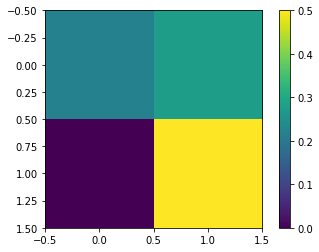

In [0]:
truth = np.array(test_rows[0], dtype=int)
classes = len(np.unique(truth)) 
conmat = np.zeros((classes, classes), dtype=float)

for i in range(len(truth)):
  t = 0
  r = 0
  if truth[i] == -1.0:
    t = 1
  if res[i] == -1.0:
    r = 1
  conmat[t][r] += 1.0
  
size = len(truth) * 1.0
conmat[0, 0] = conmat[0, 0]/np.size(truth)
conmat[1, 1] = conmat[1, 1]/np.size(truth)
conmat[1, 0] = conmat[1, 0]/np.size(truth)
conmat[0, 1] = conmat[0, 1]/np.size(truth)
print(conmat)
plt.imshow(conmat)
plt.colorbar()
acc = conmat[0][0] + conmat[1][1]
print(acc, "% accuracy") 


In [0]:
print(ham)
print(ham_probs)
print(spam)
print(spam_probs)
print(ham_prob)
print(spam_prob)
print(len(ham), len(spam))
print(sum(ham.values()), sum(spam.values()))


{'the': 322, '2002': 146, 'out': 205, 'up': 153, 'his': 102, 'by': 213, 'he': 122, '000': 148, 'could': 91, 'way': 84, 'than': 94, 'in': 1044, '30': 257, 'i': 980, 'it': 731, 'all': 253, 'my': 287, 'who': 108, 'me': 141, 'money': 91, 'want': 79, 'first': 79, 'this': 573, 'on': 95, 's': 489, 'don': 106, 't': 265, 'not': 319, 'but': 282, 'here': 96, 'just': 174, 'any': 132, 'like': 129, 'other': 132, 'how': 95, 'about': 116, 'what': 120, 'your': 435, 'http': 413, 'com': 379, 'name': 81, 'address': 74, 'our': 170, 'their': 102, 'was': 170, 'as': 358, 'one': 152, 'when': 94, 'now': 100, 'am': 94, 'us': 91, 'if': 127, 'can': 271, 'please': 95, 'get': 131, 'there': 174, '00': 68, 'have': 441, 'which': 136, '0': 153, 'would': 115, 'at': 253, 'lists': 155, 'you': 178, '10': 74, 'use': 128, 'some': 125, 'free': 158, 'more': 146, 'www': 269, 'linux': 144, 'also': 95, 'them': 86, 'a': 90, 'had': 75, 'make': 106, 'only': 129, 'time': 138, '2': 278, '5': 179, 'email': 110, 'br': 267, 'for': 62, '1'